## Input 
- recipe_train.csv
- recipe_test.csv
- countvectorizer 
    - train * 3 (name, step, ingredient)
    - vocabs collections
    - => countVectoriser, could use some methods to preprocess
- vec
    - train + test (name, step, ingredient)
    - sparse matrix / dense matrix?
- doc2vec50
    - train + test (name, step, ingredient)
    - have 50 feature
- doc2vec100
    - have 100 feature
    



## Import Library

In [32]:
%matplotlib inline

# Data Loading
import pandas as pd
import numpy as np
import scipy
import pickle

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.feature_selection import mutual_info_classif

# Natural Language Processing
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

# Evaluation
from sklearn.metrics import accuracy_score

# Utility
np.random.seed(500)
from collections import defaultdict
from scipy.sparse import hstack

## Load Data

## Variable

ntrain: train after split
train: orginal training set

#### ntrain set's text features
train_corpus_name
train_corpus_steps
train_corpus_ingr

#### validation set's text features
test_corpus_name = X_test['name']
test_corpus_steps = X_test['steps']
test_corpus_ingr = X_test['ingredients']

#### train set's text features
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_ingr_vec = scipy.sparse.load_npz('train_ingr_vec.npz')
train_steps_vec = scipy.sparse.load_npz('train_steps_vec.npz')

####  ntrain set's countvectorizer
vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)

#### ntrain sparse matrix
x_train_sm_name = vocab_name.transform(train_corpus_name)
x_train_sm_ingr = vocab_ingr.transform(train_corpus_ingr)
x_train_sm_steps = vocab_steps.transform(train_corpus_steps)

#### ntrain sparse matrix for all text features
x_train_sm_text = hstack((x_train_sm_name, x_train_sm_ingr, x_train_sm_steps))

#### preprocessed ntrain sparse matrix and countvectorizers
vocab_name_cv = new_countvectorizer().fit(train_corpus_name)
vocab_steps_cv = new_countvectorizer().fit(train_corpus_steps)
vocab_ingr_cv = new_countvectorizer().fit(train_corpus_ingr)

train_sm_name_pre = vocab_name_cv.transform(train_corpus_name)
train_sm_steps_pre = vocab_steps_cv.transform(train_corpus_steps)
train_sm_ingr_pre = vocab_ingr_cv.transform(train_corpus_ingr)

### use train cv fit test
test_name_sm = vocab_name_cv.transform(test_corpus_name)
test_steps_sm = vocab_steps_cv.transform(test_corpus_steps)
test_ingr_sm = vocab_ingr_cv.transform(test_corpus_ingr)


In [33]:
train = pd.read_csv('recipe_train.csv')

# Independent and Dependent Features
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_numeric = X.iloc[:,1:3].values

# train validation split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)

# Individual Numeric Features
n_steps = pd.DataFrame(train["n_steps"])
n_ingr = pd.DataFrame(train["n_ingredients"])

# Individual Text Features [Train & Test]
train_corpus_name = X_train['name']
train_corpus_steps = X_train['steps']
train_corpus_ingr = X_train['ingredients']

test_corpus_name = X_test['name']
test_corpus_steps = X_test['steps']
test_corpus_ingr = X_test['ingredients']

# sparse matrix for textual features
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_ingr_vec = scipy.sparse.load_npz('train_ingr_vec.npz')
train_steps_vec = scipy.sparse.load_npz('train_steps_vec.npz')

In [34]:
test_set = pd.read_csv('recipe_test.csv')
test_set_corpus_name = test_set['name']
test_set_corpus_steps = test_set['steps']
test_set_corpus_ingr = test_set['ingredients']

# Visualisation

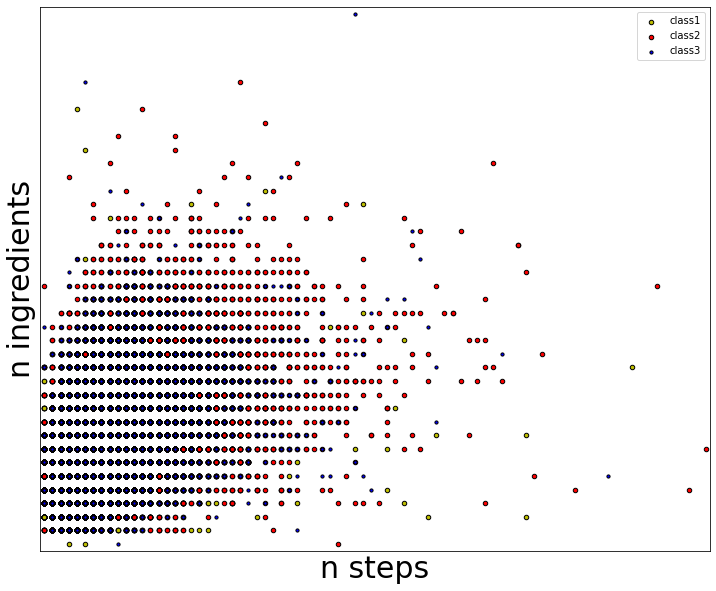

In [27]:
# Scatter Plot
# Plot the training points
x_min, x_max = X_numeric[:, 0].min() - .5, X_numeric[:, 0].max() + .5
y_min, y_max = X_numeric[:, 1].min() - .5, X_numeric[:, 1].max() + .5

font2 = {'weight' : 'normal',
'size'   : 30,
}

x_numeric_1 = train[train['duration_label']==1]['n_steps']
y_numeric_1 = train[train['duration_label']==1]['n_ingredients']
x_numeric_2 = train[train['duration_label']==2]['n_steps']
y_numeric_2 = train[train['duration_label']==2]['n_ingredients']
x_numeric_3 = train[train['duration_label']==3]['n_steps']
y_numeric_3 = train[train['duration_label']==3]['n_ingredients']

# Plot the training points
plt.figure(figsize=(12, 10))
class1 = plt.scatter(x_numeric_1, y_numeric_1, s=20,edgecolor='k',c='y')
class2 = plt.scatter(x_numeric_2, y_numeric_2,s=20, edgecolor='k',c='r')
class3 = plt.scatter(x_numeric_3, y_numeric_3,s=10,edgecolor='k',c='b')

plt.xlabel('n steps',font2)
plt.ylabel('n ingredients', font2)
plt.legend(handles=[class1,class2,class3], labels=['class1', 'class2', 'class3'])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

## Data Distribution Identification

#### Distribution of n_steps and n_ingredients

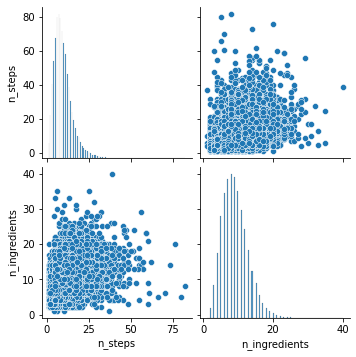

In [47]:
sns.pairplot(X)

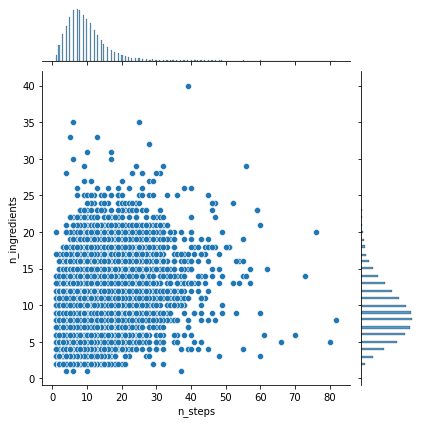

In [46]:
sns.jointplot(data=X, x="n_steps", y="n_ingredients")

In [45]:
rho = np.corrcoef(X.iloc[:,1], X.iloc[:,2])
print('n_steps and n_ingredients pearson correlation is',rho[0][1])
mi2_lst = mutual_info_classif(X_numeric, y, discrete_features=True)
print('Mutual information between n_steps and class label is:',mi2_lst[0])
print('Mutual information between n_ingredients and class label is:',mi2_lst[1])

n_steps and n_ingredients pearson correlation is 0.4096026488933777
Mutual information between n_steps and class label is: 0.07484770354524196
Mutual information between n_ingredients and class label is: 0.05331660824490941


count    40000.000000
mean         9.705025
std          5.748442
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         82.000000
Name: n_steps, dtype: float64
count    40000.00000
mean         9.09970
std          3.66157
min          1.00000
25%          6.00000
50%          9.00000
75%         11.00000
max         40.00000
Name: n_ingredients, dtype: float64
There are 1527 outliers for n_steps, they are
[]
[24, 28, 24, 22, 25, 25, 24, 32, 26, 27, 26, 29, 22, 26, 28, 25, 22, 29, 45, 33, 27, 24, 26, 26, 23, 22, 26, 24, 28, 26, 27, 24, 26, 24, 22, 30, 29, 22, 35, 37, 22, 31, 30, 39, 23, 22, 24, 36, 22, 43, 43, 25, 23, 24, 40, 22, 26, 27, 26, 32, 60, 22, 27, 29, 39, 33, 22, 34, 29, 26, 24, 29, 23, 22, 28, 24, 35, 22, 24, 25, 23, 22, 22, 24, 25, 53, 39, 25, 25, 27, 34, 26, 29, 24, 28, 22, 22, 26, 44, 25, 24, 37, 27, 25, 22, 28, 38, 24, 39, 32, 31, 25, 28, 23, 22, 23, 29, 22, 23, 41, 25, 29, 27, 22, 22, 22, 22, 26, 33, 27, 24, 25, 23, 31, 24, 

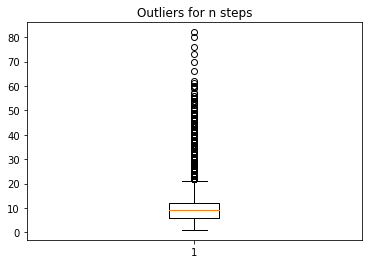

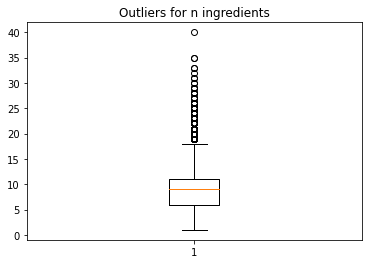

In [44]:
### Check Outliers ###

#### OUTLIERS FOR NUMERICAL ###
print(X.iloc[:,1].describe())
print(X.iloc[:,2].describe())

nsteps = X.iloc[:,1].values
ningre = X.iloc[:,2].values
print('There are %d outliers for n_steps, they are' %(len([i for i in nsteps if i < (6 - 1.5 * 6)])+len([i for i in nsteps if i > (12 + 1.5 * 6)])))
print([i for i in nsteps if i < (6 - 1.5 * 6)])
print([i for i in nsteps if i > (12 + 1.5 * 6)])
print('\n')
print('There are %d outliers for n_ingredients, they are' %(len([i for i in ningre if i < (6 - 1.5 * 6)])+len([i for i in ningre if i > (12 + 1.5 * 6)])))
print([i for i in ningre if i < (6 - 1.5 * 5)])
print([i for i in ningre if i > (11 + 1.5 * 5)])

## boxplot
plt.figure(1)
plt.title('Outliers for n steps')
plt.boxplot(x = X.iloc[:,1])
plt.figure(2)
plt.title('Outliers for n ingredients')
plt.boxplot(x = X.iloc[:,2])
plt.show()


#### Distribution of class groups

In [43]:
### 2. Data is imbalanced!!! ---SVM
print('There are %d instances for class label 1.' %(len([i for i in y if i==1])))
print('There are %d instances for class label 2.' %(len([i for i in y if i==2])))
print('There are %d instances for class label 3.' %(len([i for i in y if i==3])))

There are 17705 instances for class label 1.
There are 20246 instances for class label 2.
There are 2049 instances for class label 3.


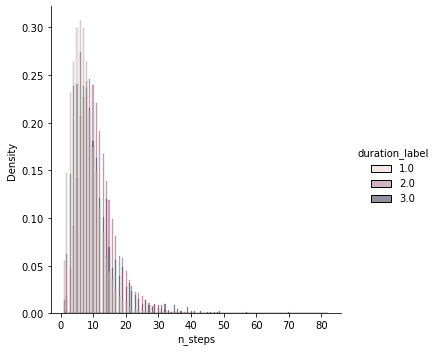

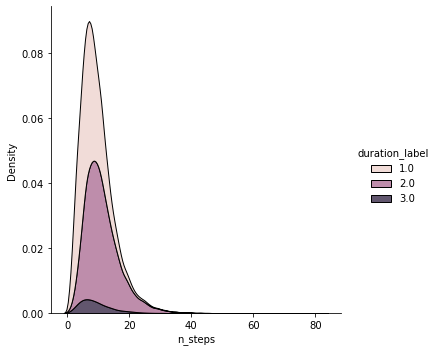

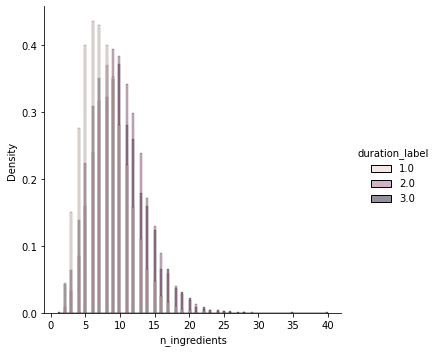

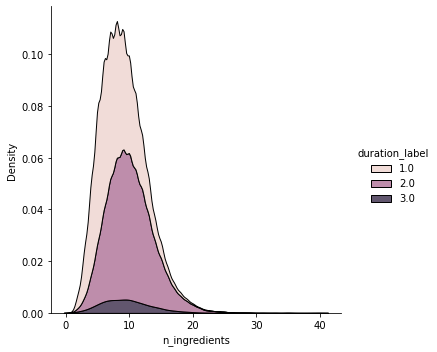

In [42]:
#data is unbanlanced, normalize each group
##n_steps
import matplotlib.cm as cm
sns.displot(X, x='n_steps', hue=y,stat="density",common_norm=False,color = cm.Accent)
###KDE estimation
sns.displot(X, x='n_steps', hue=y, kind="kde", multiple="stack")

##n_ingr
sns.displot(X, x='n_ingredients', hue=y,stat="density",common_norm=False,color = cm.Accent)
###KDE estimation
sns.displot(X, x='n_ingredients', hue=y, kind="kde", multiple="stack")

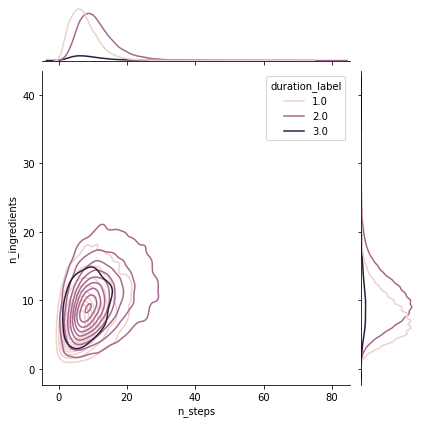

In [41]:
sns.jointplot(
    data=X,
    x="n_steps", y="n_ingredients", hue=y,
    kind="kde"
)

# Preprocessing

### Reproduce CountVectorizer

In [35]:
vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)

#### ntrain sparse matrix
train_sm_name = vocab_name.transform(train_corpus_name)
train_sm_ingr = vocab_ingr.transform(train_corpus_ingr)
train_sm_steps = vocab_steps.transform(train_corpus_steps)


train_name_list = list(vocab_name.vocabulary_)
print(train_sm_name.shape)

train_ingr_list = list(vocab_ingr.vocabulary_)
print(train_sm_ingr.shape)

train_steps_list = list(vocab_steps.vocabulary_)
print(train_sm_steps.shape)

#### ntrain sparse matrix for all text features
train_sm_text = hstack((train_sm_name, train_sm_steps, train_sm_ingr))


(26800, 8767)
(26800, 2672)
(26800, 14953)


In [36]:
## test sparse matrix
test_sm_name = vocab_name.transform(test_corpus_name)
test_sm_ingr = vocab_ingr.transform(test_corpus_ingr)
test_sm_steps = vocab_steps.transform(test_corpus_steps)


### concatenate all test text features
test_sm_text = hstack((test_sm_name, test_sm_steps, test_sm_ingr))

In [37]:
print(test_sm_name.shape)
print(test_sm_ingr.shape)
print(test_sm_steps.shape)

(13200, 8767)
(13200, 2672)
(13200, 14953)


### Reproduce test set count vectorizer

In [38]:
## test set sparse matrix
test_set_sm_name = vocab_name.transform(test_set_corpus_name)
test_set_sm_ingr = vocab_ingr.transform(test_set_corpus_ingr)
test_set_sm_steps = vocab_steps.transform(test_set_corpus_steps)
### concatenate all text features
test_sm_text = hstack((test_set_sm_name, test_set_sm_steps, test_set_sm_ingr))

### New CountVectorizers for text features with more preprocessing

In [39]:
import re
from nltk.stem import PorterStemmer

# init stemmer
porter_stemmer = PorterStemmer()

# Non-Alphetic + Stemmatisation
def text_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
#     stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

In [96]:
print(train_sm_steps.shape, test_sm_steps.shape)

(26800, 14953) (13200, 14953)


In [40]:
def new_countvectorizer():
    return CountVectorizer(min_df=5,
                           max_df=0.95, 
#                            preprocessor = text_preprocessor,
                           stop_words = "english",
                           ngram_range=(1,3),
                           max_features=4000)


In [98]:
print(train_sm_steps.shape, test_sm_steps.shape)

(26800, 14953) (13200, 14953)


In [41]:
#### preprocessed ntrain sparse matrix and countvectorizers
# -------------------LONG------------------------
vocab_name_cv = new_countvectorizer().fit(train_corpus_name)
vocab_steps_cv = new_countvectorizer().fit(train_corpus_steps)
vocab_ingr_cv = new_countvectorizer().fit(train_corpus_ingr)

train_sm_name_pre = vocab_name_cv.transform(train_corpus_name)
train_sm_steps_pre = vocab_steps_cv.transform(train_corpus_steps)
train_sm_ingr_pre = vocab_ingr_cv.transform(train_corpus_ingr)

### use train cv fit test
test_sm_name_pre = vocab_name_cv.transform(test_corpus_name)
test_sm_steps_pre = vocab_steps_cv.transform(test_corpus_steps)
test_sm_ingr_pre = vocab_ingr_cv.transform(test_corpus_ingr)

In [42]:
train_sm_text_pre = hstack((train_sm_name_pre, train_sm_steps_pre, train_sm_ingr_pre))
test_sm_text_pre = hstack((test_sm_name_pre, test_sm_steps_pre, test_sm_ingr_pre))


### Test set new preprocessed countvectorizer

In [43]:
test_set_sm_name_pre = vocab_name_cv.transform(test_set_corpus_name)
test_set_sm_steps_pre = vocab_steps_cv.transform(test_set_corpus_steps)
test_set_sm_ingr_pre = vocab_ingr_cv.transform(test_set_corpus_ingr)

test_set_sm_text_pre = hstack((test_sm_name_pre, test_sm_steps_pre, test_sm_ingr_pre))


### Tf-idf Vectorizer from non-preprocessed countvectorizer

In [44]:
def tfidf(X_train, X_test):
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True) 
    train_tfidf = tfidf_transformer.fit(X_train)
    X_train_tfidf = train_tfidf.transform(X_train)
    X_test_tfidf = train_tfidf.transform(X_test)
    return X_train_tfidf,X_test_tfidf

train_tfidf_name, test_tfidf_name = tfidf(train_sm_name, test_sm_name)
train_tfidf_steps, test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
train_tfidf_ingr, test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

## combine all text 
train_tfidf_text = hstack((train_tfidf_name, train_tfidf_steps, train_tfidf_ingr))
test_tfidf_text = hstack((test_tfidf_name, test_tfidf_steps, test_tfidf_ingr))

In [45]:
print(train_tfidf_name.shape, train_tfidf_steps.shape, train_tfidf_ingr.shape)
print(test_tfidf_name.shape, test_tfidf_steps.shape, test_tfidf_ingr.shape)
print(train_tfidf_text.shape, test_tfidf_text.shape)


(26800, 8767) (26800, 14953) (26800, 2672)
(13200, 8767) (13200, 14953) (13200, 2672)
(26800, 26392) (13200, 26392)


### Tf-idf Vectorizer from preprocessed countvectorizer

In [46]:
# tf-idf scores for processed cv
train_tfidf_name_pre, test_tfidf_name_pre = tfidf(train_sm_name_pre, test_sm_name_pre)
train_tfidf_steps_pre, test_tfidf_steps_pre = tfidf(train_sm_steps_pre, test_sm_steps_pre)
train_tfidf_ingr_pre, test_tfidf_ingr_pre = tfidf(train_sm_ingr_pre, test_sm_ingr_pre)

## combine all text
train_tfidf_text_pre = hstack((train_tfidf_name_pre, train_tfidf_steps_pre, train_tfidf_ingr_pre))
test_tfidf_text_pre = hstack((test_tfidf_name_pre, test_tfidf_steps_pre, test_tfidf_ingr_pre))

In [47]:
print(train_tfidf_name_pre.shape, train_tfidf_steps_pre.shape, train_tfidf_ingr_pre.shape)
print(test_tfidf_name_pre.shape, test_tfidf_steps_pre.shape, test_tfidf_ingr_pre.shape)
print(train_tfidf_text_pre.shape, test_tfidf_text_pre.shape)

(26800, 4000) (26800, 4000) (26800, 4000)
(13200, 4000) (13200, 4000) (13200, 4000)
(26800, 12000) (13200, 12000)


### Testing set Tf-Idf Vectorizer from preprocessed countvectorizer  

In [48]:
# tf-idf scores for processed cv
train_tfidf_name_pre, test_set_tfidf_name_pre = tfidf(train_sm_name_pre, test_set_sm_name_pre)
train_tfidf_steps_pre, test_set_tfidf_steps_pre = tfidf(train_sm_steps_pre, test_set_sm_steps_pre)
train_tfidf_ingr_pre, test_set_tfidf_ingr_pre = tfidf(train_sm_ingr_pre, test_set_sm_ingr_pre)

## combine all text
test_set_tfidf_text_pre = hstack((test_set_tfidf_name_pre, test_set_tfidf_steps_pre, test_set_tfidf_ingr_pre))

### Testing set Tf-Idf Vectorizer from non-preprocessed countvectorizer

In [49]:
# tf-idf scores for non-processed cv
train_tfidf_name, test_set_tfidf_name = tfidf(train_sm_name, test_set_sm_name)
train_tfidf_steps, test_set_tfidf_steps = tfidf(train_sm_steps, test_set_sm_steps)
train_tfidf_ingr, test_set_tfidf_ingr = tfidf(train_sm_ingr, test_set_sm_ingr)

## combine all text
test_set_tfidf_text = hstack((test_set_tfidf_name, test_set_tfidf_steps, test_set_tfidf_ingr))

### Manual Cross-validation

### Tf-Idf Preprocessed

In [15]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_train_tfidf_pre = []
cv_test_tfidf_pre = []
cv_train_tfidf_pre_labels = []
cv_test_tfidf_pre_labels = []

    
def cv_tfidf_pre(X, y):
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):
        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        train_name_cv = new_countvectorizer()
        train_steps_cv = new_countvectorizer()
        train_ingr_cv = new_countvectorizer()
        
        
        train_sm_name = train_name_cv.fit_transform(train_corpus_name)
        train_sm_steps = train_steps_cv.fit_transform(train_corpus_steps)  
        train_sm_ingr = train_ingr_cv.fit_transform(train_corpus_ingr) 

        
        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

  
        test_sm_name = train_name_cv.transform(test_corpus_name)
        test_sm_steps = train_steps_cv.transform(test_corpus_steps) 
        test_sm_ingr = train_ingr_cv.transform(test_corpus_ingr) 


        train_tfidf_name, test_tfidf_name = tfidf(train_sm_name, test_sm_name)
        train_tfidf_steps, test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
        train_tfidf_ingr, test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

        train_tfidf_all = hstack((train_tfidf_name, train_tfidf_steps, train_tfidf_ingr))   
        test_tfidf_all = hstack((test_tfidf_name, test_tfidf_steps, test_tfidf_ingr))  

        cv_train_tfidf_pre.append(train_tfidf_all)
        cv_test_tfidf_pre.append(test_tfidf_all)
        
        cv_train_tfidf_pre_labels.append(train_y)
        cv_test_tfidf_pre_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

cv_tfidf_pre(X, y)

-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------


### Tf-Idf Non-preprocessed

In [17]:


cv_train_tfidf = []
cv_test_tfidf = []
cv_train_tfidf_labels = []
cv_test_tfidf_labels = []


def cv_tfidf():
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):

        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
        vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)
        vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
        
        train_sm_name = vocab_name.transform(train_corpus_name)
        train_sm_steps = vocab_steps.transform(train_corpus_steps)  
        train_sm_ingr = vocab_ingr.transform(train_corpus_ingr) 

        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

        test_sm_name = vocab_name.transform(test_corpus_name)
        test_sm_steps = vocab_steps.transform(test_corpus_steps) 
        test_sm_ingr = vocab_ingr.transform(test_corpus_ingr) 

        cv_train_tfidf_name, cv_test_tfidf_name = tfidf(train_sm_name, test_sm_name)
        cv_train_tfidf_steps, cv_test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
        cv_train_tfidf_ingr, cv_test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

        cv_train_tfidf_all = hstack((cv_train_tfidf_name, cv_train_tfidf_steps, cv_train_tfidf_ingr))   
        cv_test_tfidf_all = hstack((cv_test_tfidf_name, cv_test_tfidf_steps, cv_test_tfidf_ingr))  

        cv_train_tfidf.append(cv_train_tfidf_all)
        cv_train_tfidf_labels.append(train_y)

        cv_test_tfidf.append(cv_test_tfidf_all)
        cv_test_tfidf_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

        
cv_tfidf()

-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------


### Preprocessed Countvectoriser

In [18]:
cv_train_countvec_pre = []
cv_test_countvec_pre = []
cv_train_countvec_pre_labels = []
cv_test_countvec_pre_labels = []

def cv_countvec_pre():
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):
        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        train_name_cv = new_countvectorizer()
        train_sm_name = train_name_cv.fit_transform(train_corpus_name)

        train_steps_cv = new_countvectorizer()
        train_sm_steps = train_steps_cv.fit_transform(train_corpus_steps)  

        train_ingr_cv = new_countvectorizer()
        train_sm_ingr = train_ingr_cv.fit_transform(train_corpus_ingr) 


        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

        test_sm_name = train_name_cv.transform(test_corpus_name)
        test_sm_steps = train_steps_cv.transform(test_corpus_steps) 
        test_sm_ingr = train_ingr_cv.transform(test_corpus_ingr) 

        cv_train_all = hstack((train_sm_name, train_sm_steps, train_sm_ingr))   
        cv_test_all = hstack((test_sm_name, test_sm_steps, test_sm_ingr))  

        cv_train_countvec_pre.append(cv_train_all)
        cv_train_countvec_pre_labels.append(train_y)

        cv_test_countvec_pre.append(cv_test_all)
        cv_test_countvec_pre_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

cv_countvec_pre()

-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------


## Evaluation 

### Micro 

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def evaluation_model_micro(model, train_countVecs, test_countVecs, train_labels, test_labels):
    f1_arr = []
    precision_arr = []
    recall_arr = []
    for i in range(5):
        print('The', i+1, 'round!')
        X_train = train_countVecs[i]
        X_test = test_countVecs[i]
        y_train = train_labels[i]
        y_test = test_labels[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average="micro")
        f1_arr.append(f1)
        print('F1 score is',f1)
        precision = precision_score(y_test, y_pred, average="micro")
        precision_arr.append(precision)
        print('Precision is',precision)
        recall = recall_score(y_test, y_pred, average="micro")
        recall_arr.append(recall)
        print('Recall is',recall)
        print('Confusion matrix is\n')
        print(confusion_matrix(y_test, y_pred))
        print('Classification report is\n')
        print(classification_report(y_test, y_pred))
    print('\nMean precision is', sum(precision_arr)/len(precision_arr))
    print('Mean recall is', sum(recall_arr)/len(recall_arr))
    print('Mean F1 is', sum(f1_arr)/len(f1_arr))

### Macro

In [19]:
def evaluation_model_macro(model, train_countVecs, test_countVecs, train_labels, test_labels):
    f1_arr = []
    precision_arr = []
    recall_arr = []
    for i in range(5):
        print('The', i+1, 'round!')
        X_train = train_countVecs[i]
        X_test = test_countVecs[i]
        y_train = train_labels[i]
        y_test = test_labels[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_arr.append(f1)
        print('F1 score is',f1)
        precision = precision_score(y_test, y_pred, average="macro")
        precision_arr.append(precision)
        print('Precision is',precision)
        recall = recall_score(y_test, y_pred, average="macro")
        recall_arr.append(recall)
        print('Recall is',recall)
        print('Confusion matrix is\n')
        print(confusion_matrix(y_test, y_pred))
        print('Classification report is\n')
        print(classification_report(y_test, y_pred))
    print('\nMean precision is', sum(precision_arr)/len(precision_arr))
    print('Mean recall is', sum(recall_arr)/len(recall_arr))
    print('Mean F1 is', sum(f1_arr)/len(f1_arr))

## Feature Selection

### 1. Mutual Information 

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

def chi2_kbest(a, b, step_size, models, titles, X_train, y_train, X_test, y_test):
    ### grid search for best K
    output = []
    for K in range(a,b,step_size):
        print('k is', K)
        x2 = SelectKBest(chi2,k=K)
        ### preprocessed count
        X_train_chi = x2.fit_transform(X_train,y_train)
        X_test_chi = x2.transform(X_test)
        
        ### if there is only a model to be tested
        if len(models)==1:
            models[0].fit(X_train_chi.toarray(),y_train)
            acc = models[0].score(X_test_chi.toarray(), y_test)
            print(titles[0], "Accuracy:",acc, '\n')
            output.append(acc)
            
        ##else iterate each model to be tested
        else:
            for title, model in zip(titles, models):
                model.fit(X_train_chi.toarray(),y_train)
                acc = model.score(X_test_chi.toarray(), y_test)
                print(title, "Accuracy:",acc, '\n')
                output.append(acc)
    return output

### 2. Chi2

In [ ]:
def mi_kbest(a, b, step_size, models, titles, X_train, y_train, X_test, y_test):
    ### grid search for best K
    output = []
    for K in range(a,b,step_size):
        print('k is', K)
        mi = SelectKBest(score_func=mutual_info_classif,k=K)
        ### preprocessed count
        X_train_mi = mi.fit_transform(X_train,y_train)
        X_test_mi = mi.transform(X_test)
        
        ### if there is only a model to be tested
        if len(models)==1:
            models[0].fit(X_train_mi.toarray(),y_train)
            acc = models[0].score(X_test_mi.toarray(), y_test)
            print(titles[0], "Accuracy:",acc, '\n')
            output.append(acc)
        
        else:
            for title, model in zip(titles, models):
                model.fit(X_train_mi.toarray(),y_train)
                acc = model.score(X_test_mi.toarray(), y_test)
                print(title, "Accuracy:",acc, '\n')
                output.append(acc)
    return output

## Train




### 0.Base classifier

In [24]:
### 0R make comparison
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(train_sm_text, y_train)
#ybar = zero_r.predict(x_train_text)
print(zero_r.score(test_sm_text, y_test))

0.5096212121212121


###  1. Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB

##tfidf preprocessed
models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
         'MultinomialNB',
         'ComplementNB']

for title, model in zip(titles, models):
    model.fit(train_tfidf_text_pre.toarray(),y_train)
    acc = model.score(test_tfidf_text_pre.toarray(), y_test)
    print(title, "Accuracy:",acc)

BernoulliNB Accuracy: 0.7361363636363636
MultinomialNB Accuracy: 0.7427272727272727
ComplementNB Accuracy: 0.7334848484848485


In [26]:
## tfidf non-preprocessed 
models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
         'MultinomialNB',
         'ComplementNB']

for title, model in zip(titles, models):
    model.fit(train_tfidf_text.toarray(),y_train)
    acc = model.score(test_tfidf_text.toarray(), y_test)
    print(title, "Accuracy:",acc)


BernoulliNB Accuracy: 0.7516666666666667
MultinomialNB Accuracy: 0.7099242424242425
ComplementNB Accuracy: 0.7254545454545455


In [27]:
## preprocessed after mi selection

models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
            'MultinomialNB',
            'ComplementNB']

mi_kbest(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)


k is 1000
BernoulliNB Accuracy: 0.7411363636363636 

MultinomialNB Accuracy: 0.7076515151515151 

ComplementNB Accuracy: 0.7083333333333334 

k is 1100
BernoulliNB Accuracy: 0.7415909090909091 

MultinomialNB Accuracy: 0.7069696969696969 

ComplementNB Accuracy: 0.7084848484848485 

k is 1200
BernoulliNB Accuracy: 0.7403030303030304 

MultinomialNB Accuracy: 0.708030303030303 

ComplementNB Accuracy: 0.7099242424242425 

k is 1300
BernoulliNB Accuracy: 0.7373484848484848 

MultinomialNB Accuracy: 0.7082575757575758 

ComplementNB Accuracy: 0.7145454545454546 

k is 1400
BernoulliNB Accuracy: 0.7378030303030303 

MultinomialNB Accuracy: 0.7076515151515151 

ComplementNB Accuracy: 0.7137878787878787 

k is 1500
BernoulliNB Accuracy: 0.7397727272727272 

MultinomialNB Accuracy: 0.7074242424242424 

ComplementNB Accuracy: 0.7137121212121212 

k is 1600
BernoulliNB Accuracy: 0.7401515151515151 

MultinomialNB Accuracy: 0.7075 

ComplementNB Accuracy: 0.7161363636363637 

k is 1700
Bernoulli

[0.7411363636363636,
 0.7076515151515151,
 0.7083333333333334,
 0.7415909090909091,
 0.7069696969696969,
 0.7084848484848485,
 0.7403030303030304,
 0.708030303030303,
 0.7099242424242425,
 0.7373484848484848,
 0.7082575757575758,
 0.7145454545454546,
 0.7378030303030303,
 0.7076515151515151,
 0.7137878787878787,
 0.7397727272727272,
 0.7074242424242424,
 0.7137121212121212,
 0.7401515151515151,
 0.7075,
 0.7161363636363637,
 0.74,
 0.7072727272727273,
 0.7156060606060606,
 0.7390151515151515,
 0.7075,
 0.7165151515151515,
 0.7399242424242424,
 0.708030303030303,
 0.7174242424242424,
 0.7406818181818182,
 0.7081818181818181,
 0.7177272727272728]

Text(0, 0.5, 'Model accuracy')

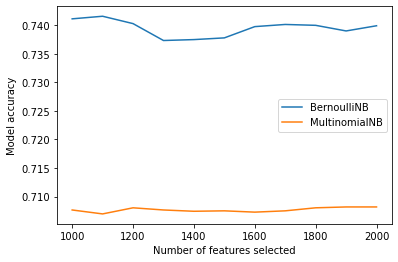

In [25]:
### learning curve for pre-processed cv after mi selection
x = range(1000,2100,100)
b = [0.7411363,0.7415909,0.7403,0.73734,0.7375,0.73780,0.7397727,0.7401515,0.74 ,0.739015,0.739924]
m = [0.70765,0.70696,0.70803,0.707651,0.707424,0.7075,0.707272,0.7075,0.70803,0.70818,0.708181]
plt.plot(x,b, label='BernoulliNB')
plt.plot(x,m, label='MultinomialNB')
plt.legend()
plt.xlabel('Number of features selected')
plt.ylabel('Model accuracy')


In [28]:
## preprocessed after chi2 selection

models=[BernoulliNB(),
            MultinomialNB(),
            ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
            'MultinomialNB',
            'ComplementNB']

chi2_kbest(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 1000
BernoulliNB Accuracy: 0.7415151515151515 

MultinomialNB Accuracy: 0.7065151515151515 

ComplementNB Accuracy: 0.7067424242424243 

k is 1100
BernoulliNB Accuracy: 0.740909090909091 

MultinomialNB Accuracy: 0.7075 

ComplementNB Accuracy: 0.7066666666666667 

k is 1200
BernoulliNB Accuracy: 0.7408333333333333 

MultinomialNB Accuracy: 0.7075 

ComplementNB Accuracy: 0.7103787878787878 

k is 1300
BernoulliNB Accuracy: 0.739469696969697 

MultinomialNB Accuracy: 0.7093181818181818 

ComplementNB Accuracy: 0.7117424242424243 

k is 1400
BernoulliNB Accuracy: 0.7400757575757576 

MultinomialNB Accuracy: 0.7068939393939394 

ComplementNB Accuracy: 0.7110606060606061 

k is 1500
BernoulliNB Accuracy: 0.7408333333333333 

MultinomialNB Accuracy: 0.7068939393939394 

ComplementNB Accuracy: 0.7128030303030303 

k is 1600
BernoulliNB Accuracy: 0.7396212121212121 

MultinomialNB Accuracy: 0.7084848484848485 

ComplementNB Accuracy: 0.713560606060606 

k is 1700
BernoulliNB Accuracy: 0

[0.7415151515151515,
 0.7065151515151515,
 0.7067424242424243,
 0.740909090909091,
 0.7075,
 0.7066666666666667,
 0.7408333333333333,
 0.7075,
 0.7103787878787878,
 0.739469696969697,
 0.7093181818181818,
 0.7117424242424243,
 0.7400757575757576,
 0.7068939393939394,
 0.7110606060606061,
 0.7408333333333333,
 0.7068939393939394,
 0.7128030303030303,
 0.7396212121212121,
 0.7084848484848485,
 0.713560606060606,
 0.7395454545454545,
 0.7100757575757576,
 0.7146212121212121,
 0.7383333333333333,
 0.7090909090909091,
 0.7159090909090909,
 0.7387121212121213,
 0.7072727272727273,
 0.7147727272727272,
 0.7384090909090909,
 0.7072727272727273,
 0.7153787878787878]

In [154]:
#### NB tuning alpha--choose best model--tiidf 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
alpha_space = np.arange(1.0e-2, 1, 0.01)
param_grid = {'alpha': alpha_space}
  
# Instantiating logistic regression classifier
bnb = BernoulliNB()
  
# Instantiating the GridSearchCV object
bnb_cv = GridSearchCV(bnb, param_grid, cv = 5)
  
bnb_cv.fit(train_tfidf_text, y_train)
  
# Print the tuned parameters and score
print("Tuned NB Parameters: {}".format(bnb_cv.best_params_)) 
print("Best score is {}".format(bnb_cv.best_score_))

Tuned NB Parameters: {'alpha': 0.87}
Best score is 0.7494029850746269


In [50]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.87)
evaluation_model_micro(bnb, cv_train_tfidf, cv_test_tfidf, cv_train_tfidf_labels, cv_test_tfidf_labels)

The 1 round!
F1 score is 0.752375
Precision is 0.752375
Recall is 0.752375
Confusion matrix is

[[2713  798   30]
 [ 899 3072   79]
 [  88   87  234]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.73      0.77      0.75      3541
         2.0       0.78      0.76      0.77      4050
         3.0       0.68      0.57      0.62       409

    accuracy                           0.75      8000
   macro avg       0.73      0.70      0.71      8000
weighted avg       0.75      0.75      0.75      8000

The 2 round!
F1 score is 0.756
Precision is 0.756
Recall is 0.756
Confusion matrix is

[[2760  752   29]
 [ 909 3058   82]
 [  99   81  230]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.73      0.78      0.76      3541
         2.0       0.79      0.76      0.77      4049
         3.0       0.67      0.56      0.61       410

    accuracy                           0.76      8000
  

In [51]:
evaluation_model_macro(bnb, cv_train_tfidf, cv_test_tfidf, cv_train_tfidf_labels, cv_test_tfidf_labels)

The 1 round!
F1 score is 0.7130043420919007
Precision is 0.730601567711778
Recall is 0.6989378023687349
Confusion matrix is

[[2713  798   30]
 [ 899 3072   79]
 [  88   87  234]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.73      0.77      0.75      3541
         2.0       0.78      0.76      0.77      4050
         3.0       0.68      0.57      0.62       409

    accuracy                           0.75      8000
   macro avg       0.73      0.70      0.71      8000
weighted avg       0.75      0.75      0.75      8000

The 2 round!
F1 score is 0.7126756655351247
Precision is 0.7309623656210008
Recall is 0.6985548850375273
Confusion matrix is

[[2760  752   29]
 [ 909 3058   82]
 [  99   81  230]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.73      0.78      0.76      3541
         2.0       0.79      0.76      0.77      4049
         3.0       0.67      0.56      0.61

In [52]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.87)

bnb.fit(train_tfidf_text, y_train)
df_bnb = bnb.predict(test_set_tfidf_text)

df_bnb = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_bnb)})
df_bnb.to_csv('results_bnb.csv', index=False)

### 2. SVM

In [31]:
from sklearn.svm import SVC
### hyperparameters
C=1

### tfidf-nonpreprocessed
models = (svm.SVC(kernel='poly',gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C))  

models = (clf.fit(train_tfidf_text, y_train) for clf in models)

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

for title, model in zip(titles, models):
    acc = model.score(test_tfidf_text,y_test)
    print(title, acc)

SVC with poly kernel 0.7615151515151515
SVC with RBF kernel 0.776060606060606


In [32]:
### tfidf-preprocessed-----
models = (svm.SVC(kernel='poly', gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C))  ###radial basis Gamma larger, fit better

models = (clf.fit(train_tfidf_text_pre, y_train) for clf in models)

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

for title, model in zip(titles, models):
    acc = model.score(test_tfidf_text_pre,y_test)
    print(title, acc)

SVC with poly kernel 0.7607575757575757
SVC with RBF kernel 0.7815909090909091


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Creating the hyperparameter grid
gamma_space = [0.01,0.05,0.1,0.5,1]
param_grid = {'gamma': gamma_space}
  
# Instantiating SVM classifier
rbfsvm = svm.SVC(kernel='rbf',C=1)

svm_cv = GridSearchCV(rbfsvm, param_grid, cv = 3)
  
svm_cv.fit(train_tfidf_text_pre, y_train)
  
# Print the tuned parameters and score
print("Tuned RBF SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

In [ ]:
svm_cv.cv_results_

In [ ]:
### learning curve for svm with different gamma
x = [0.01,0.05,0.1,0.5,1]
y=svm_cv.cv_results_['mean_test_score']

plt.plot(x,y, label='mean score',marker='o')
plt.legend()

plt.xlabel('Gamma values for SVM with RBF')
plt.ylabel('Model Accuracy')


In [ ]:
### learning curve of time for svm with different gamma
x = [0.01,0.05,0.1,0.5,1]
y=svm_cv.cv_results_['mean_fit_time']

plt.plot(x,y, label='mean fitting time',marker='o')
plt.legend()

plt.xlabel('Gamma values for SVM with RBF')
plt.ylabel('Model Fitting Time')


In [21]:
###Evaluation for SVM --- RBF C=1, gamma=0.1
from sklearn import svm

rbfsvm = svm.SVC(kernel='rbf',C=1, gamma=0.1)
evaluation_model_micro(rbfsvm, train_countVecs, test_countVecs, train_labels, test_labels)

The 1 round!
F1 score is 0.7965
Precision is 0.7965
Recall is 0.7965
Confusion matrix is

[[2865  670    6]
 [ 734 3301   15]
 [  72  131  206]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79      3541
         2.0       0.80      0.82      0.81      4050
         3.0       0.91      0.50      0.65       409

    accuracy                           0.80      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.80      0.80      0.79      8000

The 2 round!
F1 score is 0.8005
Precision is 0.8005
Recall is 0.8005
Confusion matrix is

[[2878  659    4]
 [ 725 3318    6]
 [  83  119  208]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80      3541
         2.0       0.81      0.82      0.81      4049
         3.0       0.95      0.51      0.66       410

    accuracy                           0.80      8000
   ma

In [22]:
evaluation_model_macro(rbfsvm, train_countVecs, test_countVecs, train_labels, test_labels)

The 1 round!
F1 score is 0.7507235013183432
Precision is 0.8308865612420319
Recall is 0.7092742288255813
Confusion matrix is

[[2865  670    6]
 [ 734 3301   15]
 [  72  131  206]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79      3541
         2.0       0.80      0.82      0.81      4050
         3.0       0.91      0.50      0.65       409

    accuracy                           0.80      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.80      0.80      0.79      8000

The 2 round!
F1 score is 0.7578703583797969
Precision is 0.8483264069230567
Recall is 0.7131811414483744
Confusion matrix is

[[2878  659    4]
 [ 725 3318    6]
 [  83  119  208]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80      3541
         2.0       0.81      0.82      0.81      4049
         3.0       0.95      0.51      0.6

Text(0, 0.5, 'Model F1-score for class label 3')

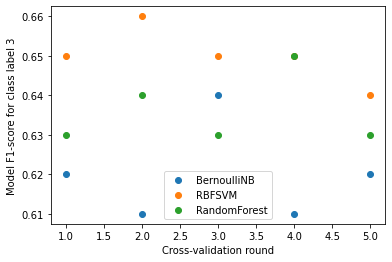

In [53]:
### cross-validation class3 precision of RBFSVM & other models
bnb = [0.62,0.61,0.64,0.61,0.62]
rbf = [0.65,0.66,0.65,0.65,0.64]
rf = [0.63,0.64,0.63,0.65,0.63]

x = range(1,6,1)
plt.scatter(x,bnb, label='BernoulliNB')
plt.scatter(x,rbf, label='RBFSVM')
plt.scatter(x,rf, label='RandomForest')
plt.legend()

plt.xlabel('Cross-validation round')
plt.ylabel('Model F1-score for class label 3')


In [ ]:
from sklearn import svm

rbfsvm = svm.SVC(kernel='rbf',C=1, gamma=0.1)

rbfsvm.fit(train_tfidf_text_pre, y_train)

df_rbfsvm = rbfsvm.predict(test_set_tfidf_text_pre)

df_rbfsvm = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_rbfsvm)})
df_rbfsvm.to_csv('results_svm.csv', index=False)

### 3. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)

rf.fit(train_tfidf_text_pre, y_train)

df_rf = rf.predict(test_set_tfidf_text_pre)

df_rf = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_rf)})
df_rf.to_csv('results_randomforest.csv', index=False)

###  4. Logistic Regression

In [55]:
## preprocessed after chi2 selection
from sklearn.linear_model import LogisticRegression
models=[LogisticRegression()]

# title for the plots
titles = ['Logitsic Regression']

chi2_kbest(1000, 2000, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)


k is 1000


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7992424242424242 

k is 1100


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.8003787878787879 

k is 1200


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7998484848484848 

k is 1300


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7987121212121212 

k is 1400


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7970454545454545 

k is 1500


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7976515151515151 

k is 1600


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7954545454545454 

k is 1700


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7950757575757575 

k is 1800


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7925757575757576 

k is 1900


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7909848484848485 



[0.7992424242424242,
 0.8003787878787879,
 0.7998484848484848,
 0.7987121212121212,
 0.7970454545454545,
 0.7976515151515151,
 0.7954545454545454,
 0.7950757575757575,
 0.7925757575757576,
 0.7909848484848485]

In [56]:
mi_kbest(1000, 2000, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 1000


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7976515151515151 

k is 1100


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7990151515151516 

k is 1200


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.798030303030303 

k is 1300


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7978030303030303 

k is 1400


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7956818181818182 

k is 1500


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.795530303030303 

k is 1600


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7972727272727272 

k is 1700


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7944696969696969 

k is 1800


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7931060606060606 

k is 1900


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logitsic Regression Accuracy: 0.7891666666666667 



[0.7976515151515151,
 0.7990151515151516,
 0.798030303030303,
 0.7978030303030303,
 0.7956818181818182,
 0.795530303030303,
 0.7972727272727272,
 0.7944696969696969,
 0.7931060606060606,
 0.7891666666666667]

In [57]:
## tfidf score for preprocessed cv 
lgr = LogisticRegression()
lgr.fit(train_tfidf_text_pre,y_train)
print("Accuracy:",lgr.score(test_tfidf_text_pre,y_test))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7883333333333333


In [58]:
### tfidf non-preprocessed cv
lgr = LogisticRegression()
lgr.fit(train_tfidf_text,y_train)
print("Accuracy:",lgr.score(test_tfidf_text, y_test))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7842424242424243


In [ ]:
### plot learning curve
mi = mi_kbest(50, 1100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)
chi2 = chi2_kbest(50, 1100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

In [ ]:
### plot learning curve
x = range(50,1100,100)
plt.plot(x,mi, label='MI')
plt.plot(x,chi2, label='CHI2')
plt.legend()

plt.xlabel('Number of features selected')
plt.ylabel('Model Accuracy for logistic regression')


### 5. Stacking

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [64]:
### all models + dt
estimators = [('bnb', BernoulliNB(alpha=0.87)),
             ('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),
             ('svr', svm.SVC(kernel='rbf', gamma=0.1, C=1)),
             ('lgr' ,LogisticRegression())]

clf = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier())

clf.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.728560606060606

In [66]:
### without svm + dt

estimators = [('bnb', BernoulliNB(alpha=0.87)),
             ('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),
             ('lgr' ,LogisticRegression())]

clf = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier())

clf.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.7265151515151516

In [83]:
### without svm + lgr
estimators = [('bnb', BernoulliNB(alpha=0.87)),
             ('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),             
              ('lgr' ,LogisticRegression())]

clf_nosvm = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

clf_nosvm.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.8053030303030303

In [68]:
### double lgr + lgr

estimators = [('bnb', BernoulliNB(alpha=0.87)),
             ('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),
             ('lgr1' ,LogisticRegression()),
             ('lgr2' ,LogisticRegression())]

clf_2lgr = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

clf_2lgr.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.803939393939394

In [21]:
### all models + lgr

estimators = [('bnb', BernoulliNB(alpha=0.87)),
             ('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),
             ('svr', svm.SVC(kernel='rbf', gamma=0.1, C=1)),
             ('lgr' ,LogisticRegression())]

clf_svm = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

clf_svm.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

0.8043939393939394

In [ ]:
### no nb + lgr

estimators = [('rf', RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)),
             ('svr', svm.SVC(kernel='rbf', gamma=0.1, C=1)),
             ('lgr' ,LogisticRegression())]

clf_nonb = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

clf_nonb.fit(train_tfidf_text_pre, y_train).score(test_tfidf_text_pre, y_test)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
### Stacking Evaluation

evaluation_model_micro(clf_svm, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

The 1 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.8032500000000001
Precision is 0.80325
Recall is 0.80325
Confusion matrix is

[[2847  673   21]
 [ 680 3342   28]
 [  71  101  237]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.80      0.80      3541
         2.0       0.81      0.83      0.82      4050
         3.0       0.83      0.58      0.68       409

    accuracy                           0.80      8000
   macro avg       0.81      0.74      0.77      8000
weighted avg       0.80      0.80      0.80      8000

The 2 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.8085
Precision is 0.8085
Recall is 0.8085
Confusion matrix is

[[2900  624   17]
 [ 705 3323   21]
 [  71   94  245]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.82      0.80      3541
         2.0       0.82      0.82      0.82      4049
         3.0       0.87      0.60      0.71       410

    accuracy                           0.81      8000
   macro avg       0.83      0.75      0.78      8000
weighted avg       0.81      0.81      0.81      8000

The 3 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.80425
Precision is 0.80425
Recall is 0.80425
Confusion matrix is

[[2886  636   19]
 [ 724 3298   27]
 [  68   92  250]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80      3541
         2.0       0.82      0.81      0.82      4049
         3.0       0.84      0.61      0.71       410

    accuracy                           0.80      8000
   macro avg       0.82      0.75      0.77      8000
weighted avg       0.81      0.80      0.80      8000

The 4 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.8140000000000001
Precision is 0.814
Recall is 0.814
Confusion matrix is

[[2928  602   11]
 [ 687 3343   19]
 [  75   94  241]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81      3541
         2.0       0.83      0.83      0.83      4049
         3.0       0.89      0.59      0.71       410

    accuracy                           0.81      8000
   macro avg       0.84      0.75      0.78      8000
weighted avg       0.82      0.81      0.81      8000

The 5 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.807875
Precision is 0.807875
Recall is 0.807875
Confusion matrix is

[[2918  606   17]
 [ 725 3310   14]
 [  70  105  235]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.82      0.80      3541
         2.0       0.82      0.82      0.82      4049
         3.0       0.88      0.57      0.70       410

    accuracy                           0.81      8000
   macro avg       0.83      0.74      0.77      8000
weighted avg       0.81      0.81      0.81      8000


Mean precision is 0.8075749999999999
Mean recall is 0.8075749999999999
Mean F1 is 0.8075750000000002


In [23]:
evaluation_model_macro(clf_svm, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

The 1 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.7701733733594894
Precision is 0.8130390169855101
Recall is 0.7411272711435871
Confusion matrix is

[[2875  645   21]
 [ 692 3330   28]
 [  69   99  241]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.81      0.80      3541
         2.0       0.82      0.82      0.82      4050
         3.0       0.83      0.59      0.69       409

    accuracy                           0.81      8000
   macro avg       0.81      0.74      0.77      8000
weighted avg       0.81      0.81      0.80      8000

The 2 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.7780281004143577
Precision is 0.8228909655955058
Recall is 0.7479240625445313
Confusion matrix is

[[2905  617   19]
 [ 702 3324   23]
 [  74   89  247]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.82      0.80      3541
         2.0       0.82      0.82      0.82      4049
         3.0       0.85      0.60      0.71       410

    accuracy                           0.81      8000
   macro avg       0.82      0.75      0.78      8000
weighted avg       0.81      0.81      0.81      8000

The 3 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.7746143811749487
Precision is 0.8131974319339617
Recall is 0.7476003460743357
Confusion matrix is

[[2895  627   19]
 [ 726 3292   31]
 [  69   90  251]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80      3541
         2.0       0.82      0.81      0.82      4049
         3.0       0.83      0.61      0.71       410

    accuracy                           0.80      8000
   macro avg       0.81      0.75      0.77      8000
weighted avg       0.81      0.80      0.80      8000

The 4 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.778895278351718
Precision is 0.8314985211751118
Recall is 0.7455168055870861
Confusion matrix is

[[2926  602   13]
 [ 698 3330   21]
 [  77   92  241]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81      3541
         2.0       0.83      0.82      0.82      4049
         3.0       0.88      0.59      0.70       410

    accuracy                           0.81      8000
   macro avg       0.83      0.75      0.78      8000
weighted avg       0.81      0.81      0.81      8000

The 5 round!


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

F1 score is 0.7709357212408879
Precision is 0.8269788331361614
Recall is 0.7364394917878284
Confusion matrix is

[[2912  609   20]
 [ 741 3295   13]
 [  69  106  235]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80      3541
         2.0       0.82      0.81      0.82      4049
         3.0       0.88      0.57      0.69       410

    accuracy                           0.81      8000
   macro avg       0.83      0.74      0.77      8000
weighted avg       0.81      0.81      0.80      8000


Mean precision is 0.8215209537652501
Mean recall is 0.7437215954274737
Mean F1 is 0.7745293709082803


## Final prediction

In [95]:
### without svm stacking
df_nosvm = clf_nosvm.predict(test_set_tfidf_text_pre)

df_nosvm = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_nosvm)})
df_nosvm.to_csv('results1.csv', index=False)

In [21]:
###with svm stacking
df_svm = clf_svm.predict(test_set_tfidf_text_pre)

df_svm = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_svm)})
df_svm.to_csv('results2.csv', index=False)

In [ ]:
###without nb stacking
df_nonb = clf_nonb.predict(test_set_tfidf_text_pre)

df_nonb = pd.DataFrame({'id': list(range(1, 10001)),
                   'duration_label': list(df_nonb)})
df_nonb.to_csv('results3.csv', index=False)